<a href="https://colab.research.google.com/github/r-h-lee/toy-projects/blob/main/spirals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def cubic_theta(c0, c1, c2, c3):
  return lambda t : c0 + c1*t + c2*t**2 + c3*t**3

def fun_x_step(x, dt, theta_left, theta_mid, theta_right):
  return x+dt/6*(math.cos(theta_left)
                    +4*math.cos(theta_mid)
                    +math.cos(theta_right))

def fun_y_step(y, dt, theta_left, theta_mid, theta_right):
  return y+dt/6*(math.sin(theta_left)
                    +4*math.sin(theta_mid)
                    +math.sin(theta_right))

def get_spiral(spiral_length, num_steps, theta_function, *coefficients):
  """Returns the x and y coordinates for a spiral drawn
  using my own implementation of Simpson's rule.
  """
  get_theta = theta_function(*coefficients)
  theta = [get_theta(0)]
  x = [0]
  y = [0]
  t = [0]
  dt = spiral_length/num_steps
  for i in range(num_steps):
    half_theta = get_theta(t[i] + dt/2)
    theta.append(get_theta(t[i] + dt))
    t.append(t[i]+dt)
    x.append(fun_x_step(x[i], dt, theta[i], half_theta, theta[i+1]))
    y.append(fun_y_step(y[i], dt, theta[i], half_theta, theta[i+1]))
  return (x, y)

In [27]:
# Library of special coefficient values
# e.g. coefficients = airy(-1)

# Yields Euler's spiral (also called Cornu's or Clothoid)
euler = (0, 0, 1, 0)

# Yields a spiral based upon the Airy function
airy = lambda x : (0, x, 0, 1/3)

# Same as airy, but reflected in the x-axis.
negative_airy = lambda x : (0, -x, 0, -1/3)


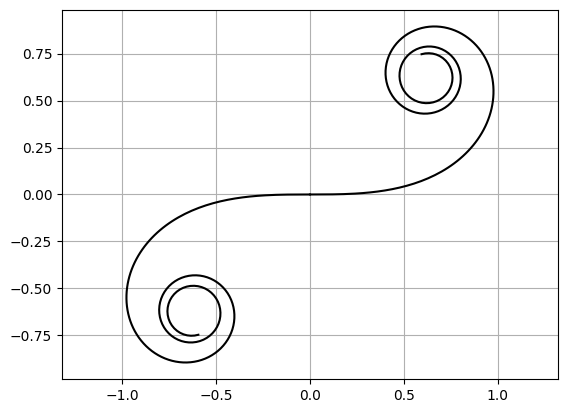

In [28]:
# Euler's spiral:
coefficients = euler
spiral_length = 4 # in either direction from origin
num_steps = 200
# positive half:
(x, y) = get_spiral(spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
# negative half:
(x, y) = get_spiral(-spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

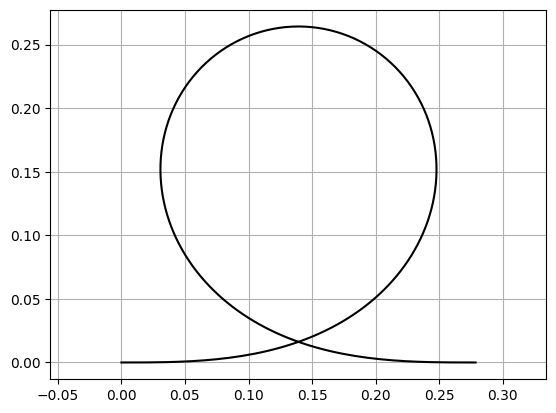

In [29]:
# Turning a corner
# turning phi radians over arc length t
# such that start and end curvature (angular acceleration)
# are both equal to 0.
# c2 = phi*3/t^2
# c3 = -phi*2/t^3

phi = 2*math.pi
spiral_length = 1
coefficients = (0, 0, phi*3/spiral_length**2,
                  -phi*2/spiral_length**3)

# I accidentally used
# phi*6/spiral_length**2, and
# -phi*6/spiral_length**3
# and got quite interesting results, worth an examination

num_steps = 200
(x, y) = get_spiral(spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

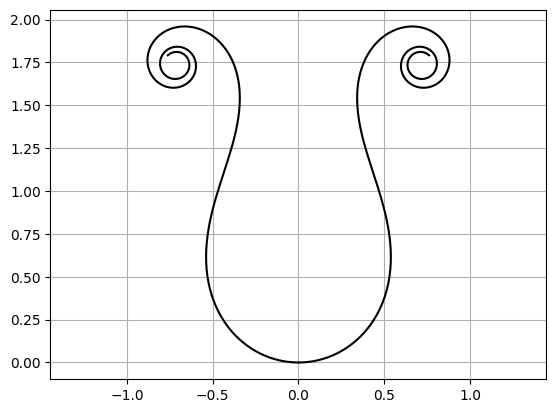

In [30]:
# Airy's urn:
coefficients = negative_airy(-2)
spiral_length = 4
num_steps = 200
# positive half:
(x, y) = get_spiral(spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
# negative half:
(x, y) = get_spiral(-spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

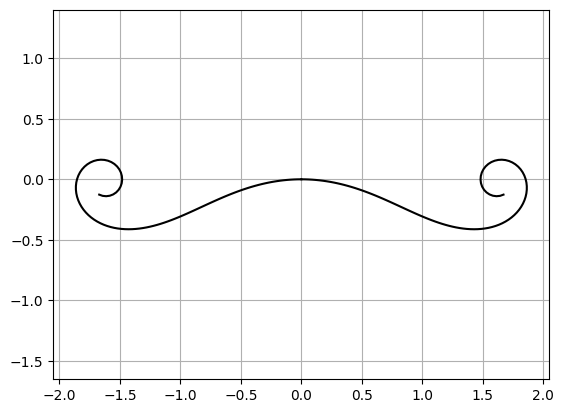

In [31]:
# Airy's moustache:
coefficients = airy(-0.75)
spiral_length = 3 # in either direction from origin
num_steps = 100
# positive half:
(x, y) = get_spiral(spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
# negative half:
(x, y) = get_spiral(-spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

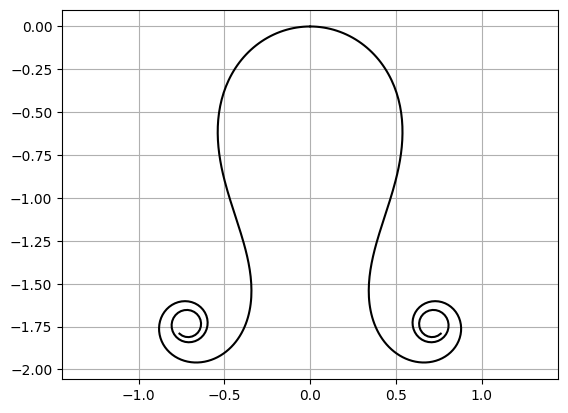

In [32]:
# Airy's spooky octopus:
coefficients = airy(-2)
spiral_length = 4
num_steps = 200
# positive half:
(x, y) = get_spiral(spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
# negative half:
(x, y) = get_spiral(-spiral_length, num_steps, cubic_theta, *coefficients)
plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

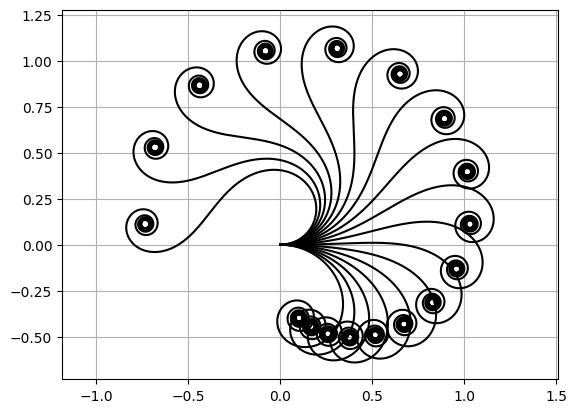

In [33]:
for c1 in np.arange(-3, 5.25, 0.5):
  coefficients = (0, c1, 1, -2)
  (x, y) = get_spiral(math.pi, 5000, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

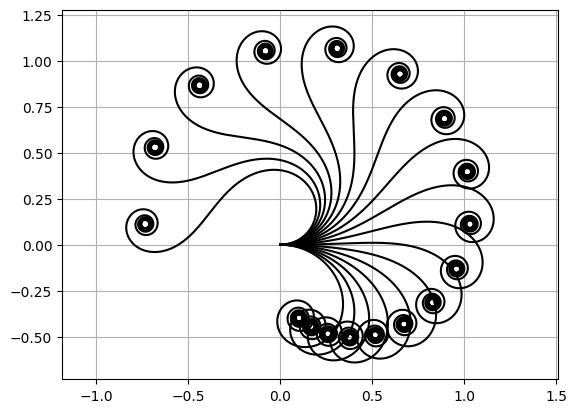

In [34]:
for c1 in np.arange(-3, 5.25, 0.5):
  coefficients = (0, c1, 1, -2)
  (x, y) = get_spiral(math.pi, 5000, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

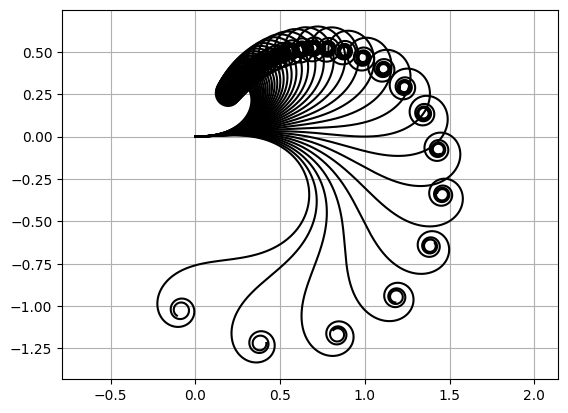

In [35]:
length = 3
num_steps = 1000
for c2 in np.arange(-5, 5.25, 0.25):
  coefficients = (0, 1, c2, 2)
  (x, y) = get_spiral(length, num_steps, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

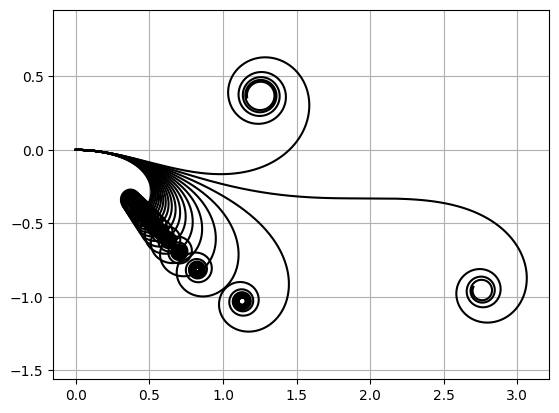

In [36]:
length = 6
num_steps = 1000 # gets rather upset for small num steps
for c3 in np.arange(-5, 0.25, 0.25):
  coefficients = (0, -1, 1, c3)
  (x, y) = get_spiral(length, num_steps, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

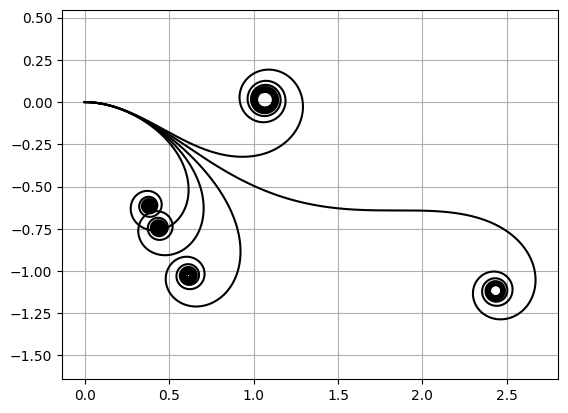

In [37]:
length = 6
num_steps = 1000
for c3 in np.arange(-2, 0.5, 0.5):
  coefficients = (0, -2, 2, c3)
  (x, y) = get_spiral(length, num_steps, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()

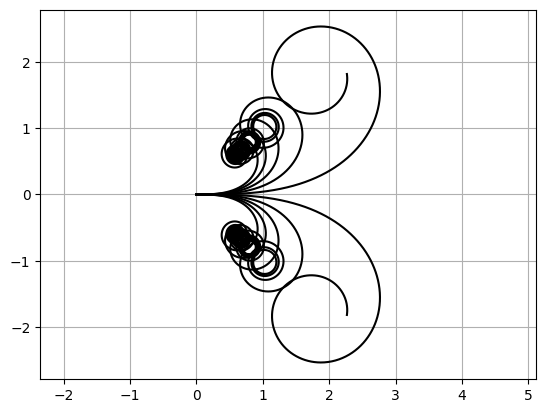

In [38]:
length = 8
num_steps = 1000
for c2 in np.arange(-1.125, 1.25, 0.25):
  coefficients = (0, 0, c2, 0)
  (x, y) = get_spiral(length, num_steps, cubic_theta, *coefficients)
  plt.plot(x, y, color='k')
plt.grid()
plt.axis("equal")
plt.show()